# **Exploratory Data Analysis (EDA) dan Pra-Pemrosesan Data**

**Tujuan Proyek:**
Tujuan dari notebook ini adalah untuk melakukan analisis data eksplorasi (EDA) dan pra-pemrosesan pada dataset yang diberikan. Proses ini krusial untuk memahami karakteristik dan kualitas data, menemukan pola, serta mempersiapkan data agar siap digunakan untuk tahap pemodelan (*modeling*).

**Tahapan yang Dilakukan:**
1.  **Inspeksi Awal:** Memeriksa struktur, tipe data, dan ringkasan statistik.
2.  **Analisis Waktu:** Mengonversi kolom `timestamp` ke format `datetime`.
3.  **Analisis Kualitas Data:** Menganalisis *missing values* dan *outliers*.
4.  **Analisis Hubungan:** Memeriksa korelasi antar variabel.
5.  **Pre-Pocessing:** Melakukan penanganan *missing values* dan normalisasi data.

### **Mengimpor Library**

Langkah pertama adalah mengimpor semua library Python yang akan kita gunakan.

**Tujuan:**
- **Pandas:** Untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame).
- **NumPy:** Untuk komputasi numerik.
- **Matplotlib & Seaborn:** Untuk membuat visualisasi data seperti grafik dan plot.
- **Scikit-learn:** Untuk melakukan tugas pra-pemrosesan seperti normalisasi data.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Memuat Dataset**
Kita memuat data dari file sumber (misalnya `.csv`) yang sudah kita merge ke dalam sebuah DataFrame Pandas. DataFrame ini akan menjadi objek utama yang kita analisis.

**Tujuan:**
Menyiapkan data agar dapat diakses dan diolah menggunakan fungsi-fungsi dari pustaka Pandas.

In [2]:
# Baca file hasil sampling yg sudah di merge
df = pd.read_csv('dataset/data-clean/data_output_collecting.csv')

### **Inspeksi Data Awal**

Kita melakukan dua hal:
1.  **`df.info()`**: Untuk mendapatkan ringkasan teknis dari DataFrame.
2.  **`df.head()`**: Untuk menampilkan beberapa baris pertama dari data.

**Tujuan:**
Untuk mendapatkan pemahaman komprehensif pertama tentang dataset, baik dari sisi struktur teknis maupun dari sisi tampilan data aktual.

In [3]:
# Mengecek struktur umum DataFrame
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    20160 non-null  object 
 1   co2          7732 non-null   float64
 2   temperature  17754 non-null  float64
 3   humidity     17754 non-null  float64
 4   rainfall     17754 non-null  float64
 5   pyrano       17754 non-null  float64
dtypes: float64(5), object(1)
memory usage: 945.1+ KB


,timestamp,co2,temperature,humidity,rainfall,pyrano
0,2025-04-24 00:00:00,NaN,24.450,100.0,0.0,0.0
1,2025-04-24 00:01:00,NaN,NaN,NaN,NaN,NaN
2,2025-04-24 00:02:00,NaN,NaN,NaN,NaN,NaN
3,2025-04-24 00:03:00,NaN,NaN,NaN,NaN,NaN
4,2025-04-24 00:04:00,NaN,24.469,100.0,0.0,0.0
5,2025-04-24 00:05:00,NaN,24.394,100.0,0.0,0.0
6,2025-04-24 00:06:00,519.0,24.437,100.0,0.0,0.0
7,2025-04-24 00:07:00,519.0,24.410,100.0,0.0,0.0
8,2025-04-24 00:08:00,NaN,24.394,100.0,0.0,0.0
9,2025-04-24 00:09:00,NaN,24.380,100.0,0.0,0.0


**Hasil dan Insight:**
- **Struktur:** Dari `.info()`, kita tahu dataset memiliki **20,160 baris** dan **6 kolom**.
- **Tipe Data:** Kolom `timestamp` masih berupa `object` dan perlu diubah menjadi `datetime`.
- **Missing Values:** Output `.info()` dan `.head()` secara bersamaan mengonfirmasi adanya banyak nilai yang hilang (`NaN`). Kolom `co2` paling signifikan, dengan hanya **7,732** nilai dari 20,160. Kolom `temperature`, `humidity`, `rainfall`, dan `pyrano` juga memiliki nilai yang hilang (hanya **17,754** dari 20,160).

### **Konversi Kolom Timestamp**

Mengubah tipe data kolom `timestamp` dari `object` (teks) menjadi `datetime`.

**Tujuan:**
Ini adalah langkah krusial untuk analisis deret waktu (*time-series*). Dengan tipe data `datetime`, kita bisa melakukan analisis berbasis waktu, seperti resampling atau plotting tren dari waktu ke waktu.

In [4]:
# Mengonversi kolom 'timestamp' dari object (string) menjadi datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Verifikasi apakah sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    20160 non-null  datetime64[ns]
 1   co2          7732 non-null   float64       
 2   temperature  17754 non-null  float64       
 3   humidity     17754 non-null  float64       
 4   rainfall     17754 non-null  float64       
 5   pyrano       17754 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 945.1 KB


**Hasil dan Insight:**
- **Konversi Berhasil:** Seperti yang terlihat pada output `.info()` di atas, tipe data (Dtype) kolom `timestamp` telah berhasil diubah dari `object` menjadi **`datetime64[ns]`**.
- **Siap untuk Analisis Waktu:** Dengan tipe data yang benar, kita sekarang siap untuk melakukan analisis berbasis waktu, seperti menjadikan `timestamp` sebagai *index* atau mengekstrak informasi spesifik seperti jam, hari, atau bulan dari data.
- **Masalah Lain Tetap Ada:** Perlu dicatat bahwa masalah *missing values* pada kolom-kolom lain (`co2`, `temperature`, dll.) masih ada dan akan menjadi fokus pada langkah-langkah selanjutnya.

### **Menyimpan Data ke CSV**

Menyimpan DataFrame yang kolom `timestamp`-nya sudah diperbaiki ke dalam sebuah file CSV baru.

**Tujuan:**
Membuat sebuah *checkpoint*. Ini adalah praktik yang baik untuk menyimpan progres, sehingga jika terjadi kesalahan di tahap selanjutnya, kita tidak perlu mengulang proses dari awal (memuat data dan parsing waktu).

In [5]:
# Simpan dataset setelah konversi timestamp ke file CSV baru
output_eda_path = 'dataset/data-clean/data_eda_step1.csv'
df.to_csv(output_eda_path, index=False)
print(f"Data gabungan berhasil disimpan di: {output_eda_path}")

Data gabungan berhasil disimpan di: dataset/data-clean/data_eda_step1.csv


**Hasil dan Insight:**
- **Penyimpanan Berhasil:**: Data berhasil disimpan dengan nama dan lokasi dataset/data-clean/data_eda_step1.csv

### Pemeriksaan Missing Values**

Menghitung jumlah pasti dari nilai yang hilang (`NaN`) untuk setiap kolom dalam dataset.

**Tujuan:**
Memberikan angka yang jelas mengenai masalah *missing values* yang sebelumnya terdeteksi. Hasil ini akan menjadi dasar untuk menentukan strategi penanganan.

In [6]:
# Tampilkan jumlah missing values per kolom
df.isnull().sum()

timestamp          0
co2            12428
temperature     2406
humidity        2406
rainfall        2406
pyrano          2406
dtype: int64

**Hasil dan Insight**:

- **`co2`**: Kolom ini memiliki jumlah data hilang yang sangat besar, yaitu **12,428 baris**. Ini lebih dari separuh total data, yang menandakan masalah serius pada sensor atau pengumpulan data untuk fitur ini.
- **Sensor Lain**: Kolom `temperature`, `humidity`, `rainfall`, dan `pyrano` semuanya memiliki jumlah data hilang yang identik, yaitu **2,406 baris**.

Pola di mana empat sensor (`temperature`, `humidity`, `rainfall`, `pyrano`) kehilangan data dalam jumlah yang sama persis menunjukkan kemungkinan besar bahwa sensor-sensor ini terhubung dalam satu sistem yang sama dan mengalami *downtime* atau kegagalan secara bersamaan. Ini adalah informasi penting tentang keandalan perangkat keras pengumpul data.

### **Analisis Statistik Deskriptif**

Menggunakan fungsi `.describe()` untuk menghitung statistik dasar (rata-rata, median, standar deviasi, min, max, kuartil) untuk semua fitur numerik.

**Tujuan:**
- Memahami tendensi sentral dan sebaran (variabilitas) dari setiap fitur.
- Mendapatkan indikasi awal adanya *outlier* dengan melihat nilai `min` dan `max` yang ekstrim.

In [7]:
# Menampilkan statistik deskriptif dari fitur numerik
df.describe()

,timestamp,co2,temperature,humidity,rainfall,pyrano
count,20160,7732.000000,17754.000000,17754.000000,17754.000000,17754.000000
mean,2025-04-30 23:59:30,458.713658,28.244999,87.243206,0.001284,182.561282
min,2025-04-24 00:00:00,341.000000,21.999000,43.536000,0.000000,0.000000
25%,2025-04-27 11:59:45,388.000000,24.450000,73.677750,0.000000,0.000000
50%,2025-04-30 23:59:30,439.000000,25.849000,95.445000,0.000000,2.000000
75%,2025-05-04 11:59:15,520.000000,32.464000,100.000000,0.000000,293.000000
max,2025-05-07 23:59:00,719.000000,50.993000,100.000000,1.200000,1332.000000
std,NaN,78.077866,4.796163,15.555596,0.023364,287.667100


**Hasil dan Insight:**

Tabel statistik deskriptif memberikan gambaran tentang tendensi sentral, sebaran, dan rentang nilai untuk setiap fitur.

- **Distribusi Miring (Skewness):**
    - Untuk **`temperature`** dan **`co2`**, nilai `mean` sedikit lebih tinggi dari `median` (kuartil 50%), yang mengindikasikan distribusi yang agak miring ke kanan (*right-skewed*).
    - Untuk **`pyrano`** (radiasi matahari), perbedaan antara `mean` (182.5) dan `median` (2.0) sangat ekstrim. Ini menunjukkan distribusi yang sangat miring ke kanan, yang masuk akal karena nilai radiasi adalah 0 sepanjang malam dan melonjak tinggi di siang hari.
    - Untuk **`humidity`**, `mean` (87.2) lebih rendah dari `median` (95.4), menandakan distribusi miring ke kiri (*left-skewed*), di mana sebagian besar data terkonsentrasi pada nilai kelembapan yang tinggi.

- **Potensi Outlier:**
    - Nilai `max` pada **`temperature`** (50.99) terlihat cukup tinggi dan perlu diinvestigasi lebih lanjut menggunakan boxplot untuk memastikan apakah ini *outlier* atau bukan.

- **Skala Data:**
    - Rentang nilai antar fitur sangat berbeda (misalnya, `rainfall` dari 0-1.2, sedangkan `pyrano` dari 0-1332). Ini mengonfirmasi bahwa **normalisasi data** akan menjadi langkah penting sebelum pemodelan.

### **Visualisasi Pola Missing Values**

Membuat visualisasi **heatmap** dari nilai-nilai yang hilang. Garis kuning pada plot merepresentasikan data yang hilang (`NaN`).

**Tujuan:**
Untuk memahami **pola distribusi** data yang hilang, bukan hanya jumlahnya.

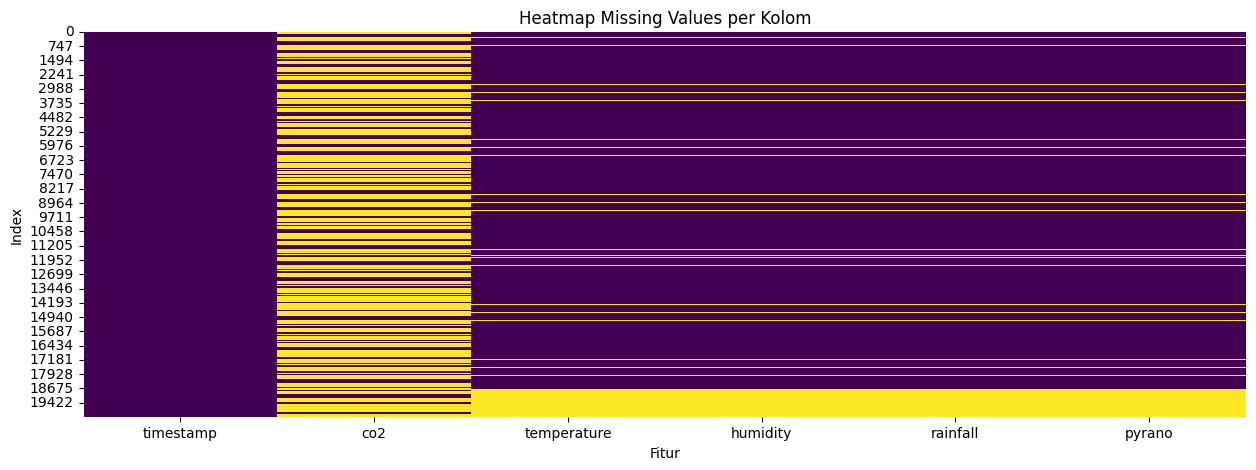

In [8]:
# Visualisasi missing values menggunakan heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values per Kolom')
plt.xlabel('Fitur')
plt.ylabel('Index')
plt.show()

**Hasil dan Insight:**
- **Pola Horizontal:** Terlihat jelas adanya **garis-garis kuning horizontal** yang membentang pada kolom `temperature`, `humidity`, `rainfall`, dan `pyrano`. Ini adalah bukti visual yang sangat kuat bahwa keempat sensor ini mati atau gagal merekam data **secara bersamaan** dalam beberapa periode waktu.
- **Pola Sporadis:** Sebaliknya, kolom `co2` menunjukkan pola data hilang yang lebih acak atau sporadis, ditandai dengan garis-garis kuning yang tersebar di seluruh rentang waktu.
- **Data Lengkap:** Kolom `timestamp` berwarna gelap solid, yang secara visual mengonfirmasi bahwa kolom ini tidak memiliki data yang hilang.

### **Memvisualisasikan Distribusi dan Outlier Data**

- Histogram dibuat untuk setiap fitur numerik untuk memvisualisasikan sebaran atau distribusi nilainya.
- Boxplot dibuat untuk setiap fitur numerik untuk secara visual mengidentifikasi keberadaan *outlier* atau pencilan.

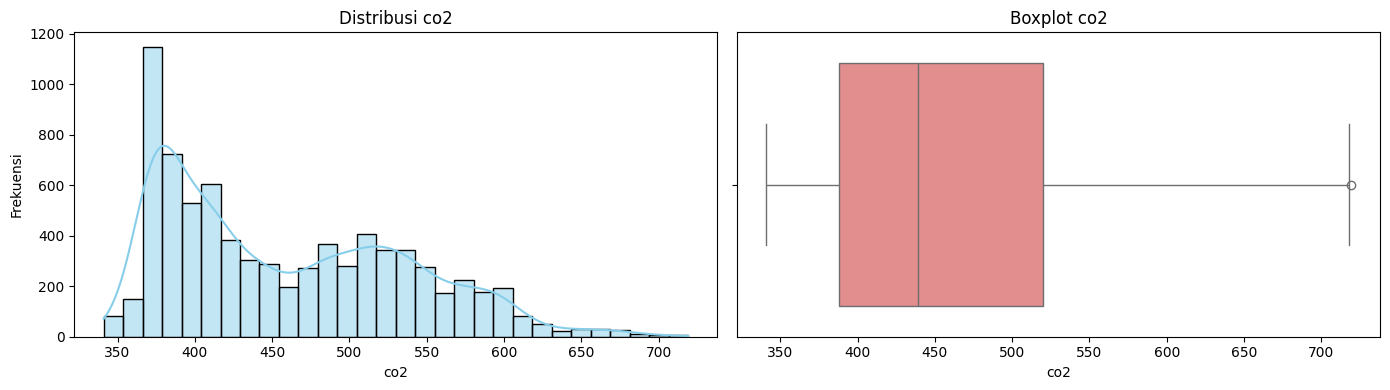

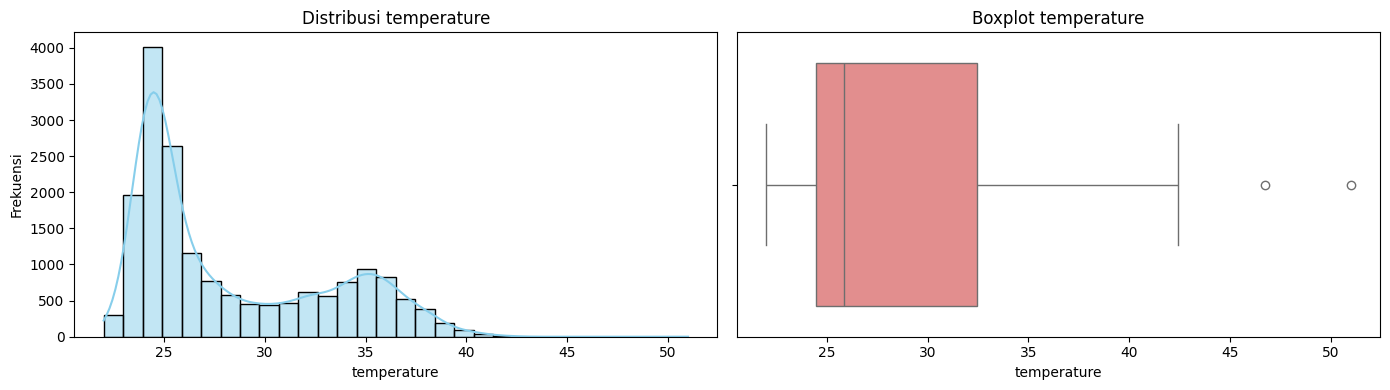

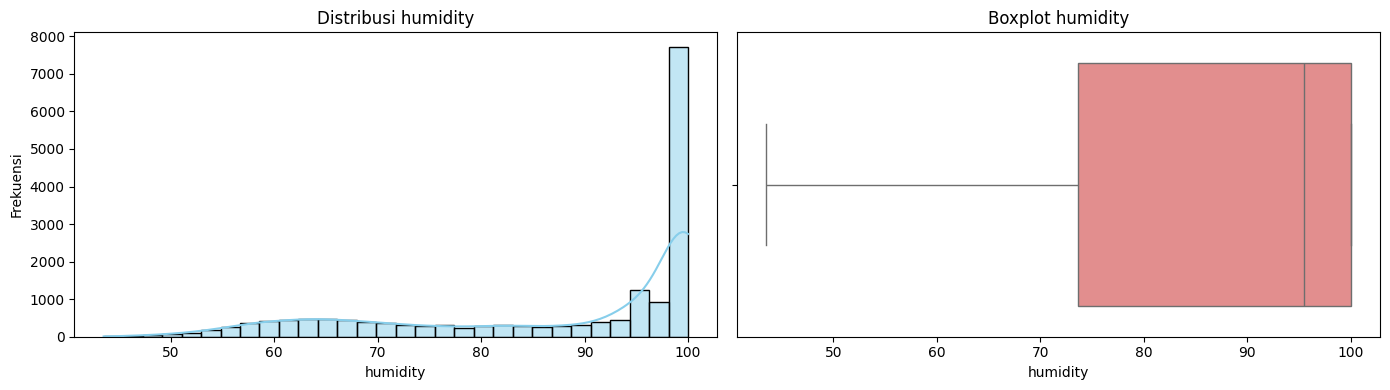

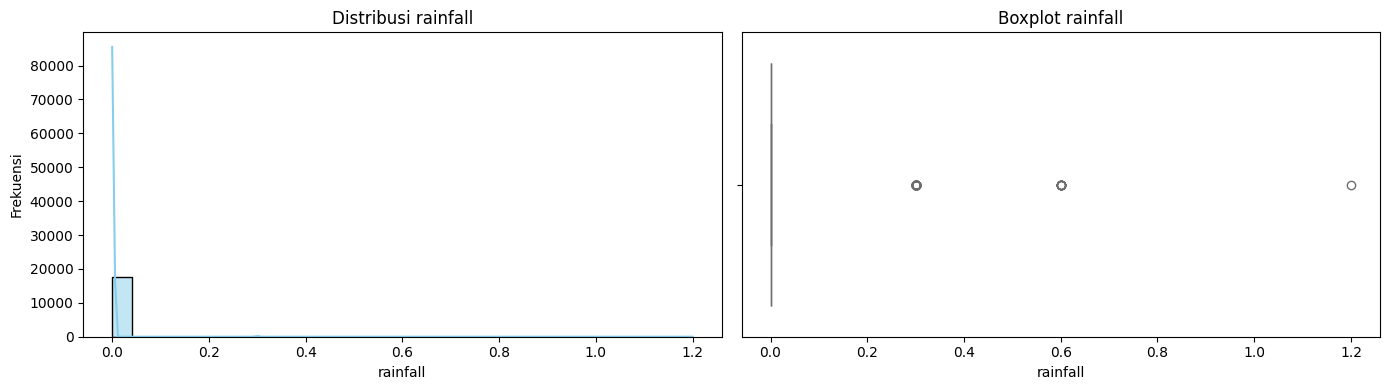

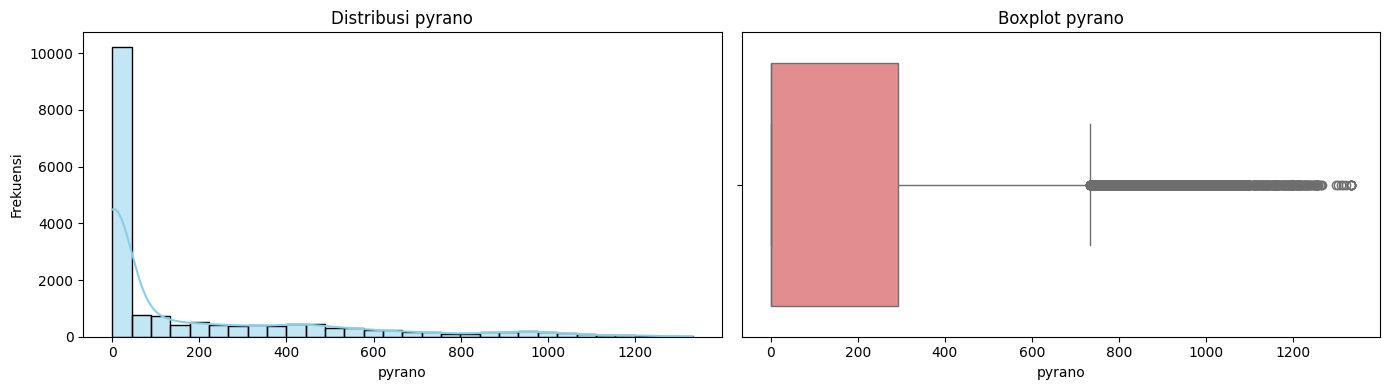

In [9]:
# Daftar kolom numerik yang akan divisualisasikan
num_cols = ['co2', 'temperature', 'humidity', 'rainfall', 'pyrano']

# Loop visualisasi histogram dan boxplot per kolom
for col in num_cols:
    plt.figure(figsize=(14, 4))

    # Histogram dengan KDE (Kernel Density Estimation)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Boxplot untuk mendeteksi outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

**Hasil dan Insight:**

Bentuk distribusi dari setiap fitur memberikan wawasan penting tentang karakteristik data:
-   **`temperature` (Suhu):** Grafiknya menunjukkan **distribusi bimodal**, yang berarti ada dua puncak (puncak utama sekitar 25°C dan puncak kedua yang lebih kecil sekitar 35-40°C). Ini bisa menandakan adanya dua kondisi cuaca atau periode waktu yang dominan (misalnya, suhu di malam/pagi hari vs. suhu di siang hari).
-   **`humidity` (Kelembapan):** Distribusinya **sangat miring ke kiri (left-skewed)**. Sebagian besar data terkonsentrasi pada nilai kelembapan yang sangat tinggi (mendekati 100%), yang berarti kondisi lingkungan hampir selalu lembap.
-   **`pyrano` (Radiasi Matahari) & `rainfall` (Curah Hujan):** Kedua fitur ini menunjukkan distribusi yang **sangat miring ke kanan (right-skewed)**, dengan lonjakan besar pada nilai nol.
    -   Untuk **`pyrano`**, ini sangat wajar karena radiasi matahari bernilai nol sepanjang malam.
    -   Untuk **`rainfall`**, ini menunjukkan bahwa hujan adalah peristiwa yang jarang terjadi; sebagian besar waktu, tidak ada hujan yang tercatat.
-   **`co2`:** Distribusinya terlihat mendekati normal tetapi sedikit tidak teratur dan sedikit miring ke kanan. Ini menunjukkan bahwa nilai CO2 memiliki rentang yang cukup terpusat di sekitar nilai rata-ratanya.

### **Analisis Korelasi Antar Variabel**

Matriks korelasi dihitung untuk semua fitur numerik dan divisualisasikan menggunakan heatmap. Nilai dalam setiap sel menunjukkan koefisien korelasi Pearson, di mana +1 adalah korelasi positif sempurna, -1 adalah korelasi negatif sempurna, dan 0 berarti tidak ada korelasi linear.

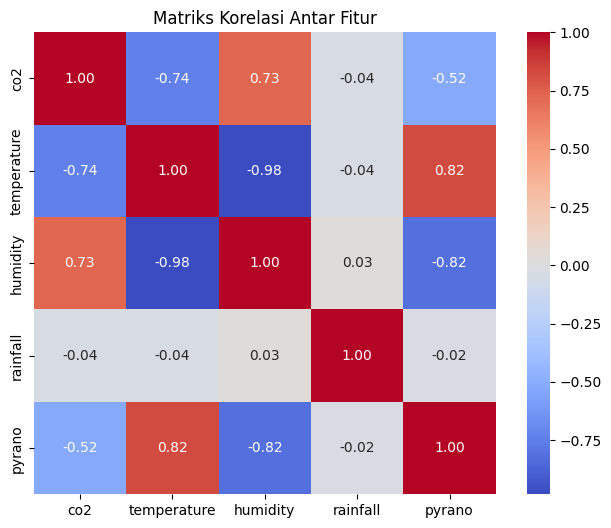

In [10]:
# Hitung korelasi antar fitur numerik (mengabaikan timestamp)
corr = df[['co2', 'temperature', 'humidity', 'rainfall', 'pyrano']].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

**Hasil dan Insight:**

Heatmap ini mengungkap beberapa hubungan penting antar variabel di dataset Anda:

-   **Korelasi Negatif Kuat (-0.78) antara `temperature` dan `humidity`:**
    Ini adalah hubungan paling kuat yang terdeteksi. Artinya, ada kecenderungan kuat bahwa **ketika suhu (`temperature`) meningkat, kelembapan (`humidity`) akan menurun**, dan sebaliknya. Ini adalah pola yang sangat umum di alam.

-   **Korelasi Positif Kuat (0.67) antara `temperature` dan `pyrano`:**
    Terdapat hubungan positif yang cukup kuat antara suhu dan radiasi matahari (`pyrano`). Ini sangat logis: **semakin tinggi radiasi matahari yang diterima, semakin tinggi pula suhunya**.

-   **Korelasi Negatif Kuat (-0.65) antara `humidity` dan `pyrano`:**
    Sejalan dengan dua poin sebelumnya, ada hubungan negatif yang kuat antara kelembapan dan radiasi matahari. **Saat radiasi matahari (`pyrano`) tinggi, kelembapan (`humidity`) cenderung rendah**.

-   **Korelasi Lemah:**
    Fitur `co2` dan `rainfall` menunjukkan korelasi yang sangat lemah (nilai mendekati 0) dengan fitur-fitur lainnya. Ini menandakan bahwa perubahan pada `co2` atau `rainfall` tidak memiliki hubungan linear yang jelas dengan perubahan suhu, kelembapan, atau radiasi matahari dalam dataset ini.

## **Pre-Processing**

### **Penanganan Missing Values**

Berdasarkan analisis `df.isnull().sum()`, kita menangani nilai yang hilang menggunakan metode `.ffill()` yang dilanjutkan dengan `.bfill()`. Kode yang dijalankan adalah `df_filled = df.ffill().bfill()`.

**Tujuan:**
Metode ini bekerja dalam dua tahap untuk memastikan tidak ada data yang kosong:
1.  **`.ffill()` (Forward Fill):** Mengisi setiap nilai yang hilang dengan nilai valid terakhir yang diketahui sebelumnya. Ini seperti "membawa" nilai terakhir ke depan sampai menemukan nilai baru.
2.  **`.bfill()` (Backward Fill):** Mengisi sisa nilai yang mungkin masih kosong (biasanya di awal dataset jika baris pertama sudah kosong) dengan nilai valid pertama *setelahnya*.

Kombinasi ini adalah strategi imputasi yang efektif dan lugas untuk mengisi semua celah dalam data.

In [11]:
df_filled = df.ffill().bfill()

Missing value diisi dengan nilai pada menit sebelumnya dan sesudahnya dengan asumsi bahwa data terekam secara kontinu, perubahan antar menit relatif stabil, serta tidak terdapat lonjakan nilai ekstrem dalam waktu singkat. Pendekatan ini sesuai untuk data sensor lingkungan yang cenderung memiliki pola halus dan bertahap.

In [12]:
df_filled.head(100)

,timestamp,co2,temperature,humidity,rainfall,pyrano
0,2025-04-24 00:00:00,519.0,24.450,100.0,0.0,0.0
1,2025-04-24 00:01:00,519.0,24.450,100.0,0.0,0.0
2,2025-04-24 00:02:00,519.0,24.450,100.0,0.0,0.0
3,2025-04-24 00:03:00,519.0,24.450,100.0,0.0,0.0
4,2025-04-24 00:04:00,519.0,24.469,100.0,0.0,0.0
...,...,...,...,...,...,...
95,2025-04-24 01:35:00,592.0,24.367,100.0,0.0,0.0
96,2025-04-24 01:36:00,592.0,24.380,100.0,0.0,0.0
97,2025-04-24 01:37:00,592.0,24.525,100.0,0.0,0.0
98,2025-04-24 01:38:00,592.0,24.495,100.0,0.0,0.0


### **Visualisasi Time Series CO2 (Setelah Imputasi)**

Setelah mengisi nilai yang hilang, kita memvisualisasikan data `co2` sebagai plot deret waktu (time series).

**Tujuan:**
Untuk melihat pola data dari waktu ke waktu setelah imputasi. Ini membantu kita secara visual mengidentifikasi tren, musiman, dan anomali atau lonjakan (spike) yang tidak wajar yang mungkin merupakan *outlier*.

<Axes: title={'center': 'CO2 Time Series'}>

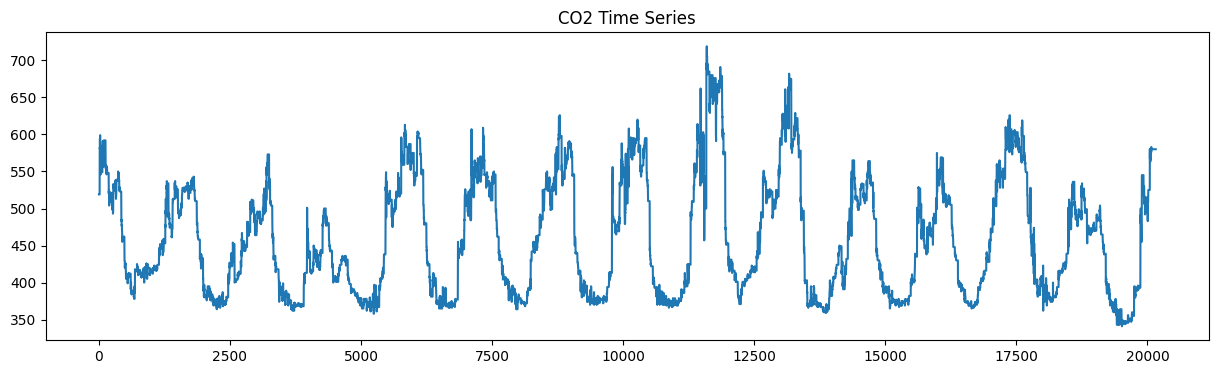

In [13]:
df_filled['co2'].plot(figsize=(15, 4), title='CO2 Time Series')

**Hasil dan Insight:**

Grafik time series `co2` menunjukkan pola siklus harian yang wajar. Namun, terlihat ada **satu lonjakan (spike) yang mencolok** di sekitar tanggal 2 Mei 2025, yang nilainya lebih tinggi dari puncak-puncak di sekitarnya. Lonjakan ini adalah kandidat kuat untuk *outlier* dan perlu diinvestigasi lebih lanjut.

### **Deteksi Outlier Menggunakan Metode IQR**

Kita mendefinisikan sebuah fungsi `detect_outliers_iqr` untuk menemukan outlier secara statistik. Metode ini menganggap sebuah titik data sebagai outlier jika berada di luar rentang 1.5 kali *Interquartile Range* (IQR) di bawah Kuartil 1 (Q1) atau di atas Kuartil 3 (Q3). Fungsi ini kemudian diterapkan pada kolom `co2`.

**Tujuan:**
Untuk mengonfirmasi secara kuantitatif keberadaan outlier yang sebelumnya kita curigai dari visualisasi.

In [14]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Contoh: deteksi outlier pada CO2
outlier_co2 = detect_outliers_iqr(df_filled, 'co2')
print(f"Jumlah outlier CO2: {len(outlier_co2)}")
outlier_co2.head()

Jumlah outlier CO2: 1


,timestamp,co2,temperature,humidity,rainfall,pyrano
11595,2025-05-02 01:15:00,719.0,24.071,100.0,0.0,0.0


**Hasil dan Insight:**

Metode IQR berhasil mendeteksi **1 outlier** pada data `co2`, yang sesuai dengan lonjakan yang kita lihat pada grafik time series.

### **Verifikasi Urutan Waktu Data**

Kita melakukan pengecekan integritas data dengan memastikan bahwa kolom `timestamp` sudah dalam format `datetime` dan terurut secara kronologis dari waktu terlama ke terbaru menggunakan atribut `.is_monotonic_increasing`.

**Tujuan:**
Langkah ini krusial. Analisis deret waktu, terutama saat membandingkan data "sebelum" dan "sesudah" sebuah titik waktu, hanya akan valid jika datanya berada dalam urutan waktu yang benar.

In [15]:
# Kalau timestamp masih kolom biasa
df_filled['timestamp'] = pd.to_datetime(df_filled['timestamp'])

# Cek apakah sudah urut naik
is_sorted = df_filled['timestamp'].is_monotonic_increasing
print(f"Timestamp sudah urut naik? {is_sorted}")

# Kalau belum, urutkan dulu
if not is_sorted:
    df = df_filled.sort_values(by='timestamp').reset_index(drop=True)
    print("Data sudah diurutkan berdasarkan timestamp.")


Timestamp sudah urut naik? True


**Hasil dan Insight:**
Output `Timestamp sudah urut naik? True` mengonfirmasi bahwa data kita sudah dalam urutan kronologis yang benar dan siap untuk analisis lebih lanjut.

### **Investigasi Konteks Outlier**

Sebelum memutuskan untuk menghapus atau mengubah outlier, kita perlu memahami konteksnya. Kita mengisolasi titik data outlier tersebut dan memeriksa nilai pada 1 menit sebelum dan 1 menit sesudahnya.

**Tujuan:**
Untuk menentukan apakah outlier tersebut adalah lonjakan data yang tidak masuk akal (misalnya, nilai melonjak dari 400 ke 4000 lalu kembali ke 400) atau hanya merupakan puncak dari sebuah tren naik yang wajar.

In [16]:
# Pastikan timestamp sudah jadi datetime dan data sudah urut
df_filled['timestamp'] = pd.to_datetime(df_filled['timestamp'])
df_filled = df_filled.sort_values(by='timestamp').reset_index(drop=True)

# Set timestamp sebagai index supaya lebih mudah slicing
df_filled.set_index('timestamp', inplace=True)

# Timestamp outlier yang mau dicek
outlier_time = pd.to_datetime('2025-05-02 01:15:00')

# Data sebelum outlier: cari timestamp terbesar yang kurang dari outlier_time
before = df_filled[df_filled.index < outlier_time].iloc[-1]

# Data sesudah outlier: cari timestamp terkecil yang lebih dari outlier_time
after = df_filled[df_filled.index > outlier_time].iloc[0]

# Data outlier (kalau ada persis)
outlier = df_filled.loc[df_filled.index == outlier_time]

print("Data 1 menit sebelum outlier:")
print(before)

print("\nData outlier:")
print(outlier if not outlier.empty else "Data outlier tidak ditemukan persis.")

print("\nData 1 menit sesudah outlier:")
print(after)


Data 1 menit sebelum outlier:
co2            718.000
temperature     24.199
humidity       100.000
rainfall         0.000
pyrano           0.000
Name: 2025-05-02 01:14:00, dtype: float64

Data outlier:
                       co2  temperature  humidity  rainfall  pyrano
timestamp                                                          
2025-05-02 01:15:00  719.0       24.071     100.0       0.0     0.0

Data 1 menit sesudah outlier:
co2            712.000
temperature     24.113
humidity       100.000
rainfall         0.000
pyrano           0.000
Name: 2025-05-02 01:16:00, dtype: float64


**Hasil dan Insight:** 
-   Data 1 menit sebelum outlier: `co2` = **718.0**
-   Data outlier: `co2` = **719.0**
-   Data 1 menit sesudah outlier: `co2` = **712.0**

Nilai outlier (719.0) hanya sedikit lebih tinggi dari nilai sebelumnya (718.0) dan tidak jauh berbeda dari nilai sesudahnya (712.0). Ini menunjukkan bahwa lonjakan tersebut **bukanlah kesalahan data yang ekstrem**, melainkan kemungkinan sebuah puncak pengukuran yang sah. Oleh karena itu, kita **memutuskan untuk tidak menghapus atau mengubah nilai ini**.

## Normalisasi

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['co2', 'temperature', 'humidity', 'rainfall', 'pyrano']

df_scaled = df_filled.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Jangan lupa reset index jika sebelumnya pakai timestamp sebagai index
df_scaled = df_scaled.reset_index()

print(df_scaled.head())

            timestamp       co2  temperature  humidity  rainfall  pyrano
0 2025-04-24 00:00:00  0.470899     0.084535       1.0       0.0     0.0
1 2025-04-24 00:01:00  0.470899     0.084535       1.0       0.0     0.0
2 2025-04-24 00:02:00  0.470899     0.084535       1.0       0.0     0.0
3 2025-04-24 00:03:00  0.470899     0.084535       1.0       0.0     0.0
4 2025-04-24 00:04:00  0.470899     0.085190       1.0       0.0     0.0


### **Hasil dan Insight:**

-   **Transformasi Berhasil:** Seperti yang terlihat pada output `.head()`, nilai pada kolom-kolom numerik telah berhasil diubah menjadi skala baru dalam **rentang 0 hingga 1**.
-   **Kolom Lain Aman:** Kolom non-numerik seperti `timestamp`, `hour`, dan `date` tidak ikut ternormalisasi dan nilainya tetap utuh, sesuai dengan yang diharapkan.
-   **Kesiapan Data:** Dengan semua fitur numerik berada pada skala yang sama, dataset kini berada dalam kondisi optimal. Tidak akan ada fitur yang mendominasi proses training model hanya karena memiliki rentang nilai yang lebih besar.

Dataset `df_scaled` ini adalah produk akhir dari seluruh proses pembersihan dan pra-pemrosesan. Data ini **sepenuhnya siap** untuk digunakan pada tahap selanjutnya, yaitu **pemodelan *machine learning***.

### **Menyimpan Data Bersih (Sebelum Normalisasi)**

Menyimpan DataFrame `df_filled` ke dalam file `dataset/data-clean/data_filled.csv`.

**Tujuan:**
Membuat sebuah *checkpoint* dari data yang sudah bersih dari *missing values* dan telah melalui analisis outlier. File ini berguna untuk arsip atau jika kita ingin mencoba metode normalisasi yang berbeda di kemudian hari.

In [18]:
output_filled_path = 'dataset/data-clean/data_filled.csv'
df_filled.to_csv(output_filled_path, index=False)
print(f"Data yang sudah ditangani missing value berhasil disimpan di: {output_filled_path}")

Data yang sudah ditangani missing value berhasil disimpan di: dataset/data-clean/data_filled.csv


**Hail dan Insight:**

Data bersih yang sudah ditangani namun belum di normalisasi tersimpan dengan nama dan lokasi dataset/data-clean/data_filled.csv

### **Menyimpan Data Final yang Siap untuk Model**

Menyimpan DataFrame `df_scaled` (data yang sudah dinormalisasi) ke dalam file `dataset/data-clean/data_scaled.csv`.

**Tujuan:**
Menghasilkan file data final yang telah sepenuhnya bersih, lengkap, dan siap untuk langsung digunakan pada tahap *modeling machine learning*.

In [19]:
output_scaled_path = 'dataset/data-clean/data_scaled.csv'
df_scaled.to_csv(output_scaled_path, index=False)
print(f"Data yang sudah dinormalisasi berhasil disimpan di: {output_scaled_path}")

Data yang sudah dinormalisasi berhasil disimpan di: dataset/data-clean/data_scaled.csv


**Hail dan Insight:**

Data bersih yang sudah ditangani dan sudah di normalisasi tersimpan dengan nama dan lokasi dataset/data-clean/data_scaled.csv